# Home 4: Build a CNN for image recognition.

### Name: [Your-Name?]


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


170500096/170498071 [==============================] - 167s 1us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    one_hot=numpy.zeros((y.shape[0],10))
    for i in range(y.shape[0]):
        index=y[i]
        one_hot[i,index]=1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [11]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import BatchNormalization as BN
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(256, (1, 1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
__________

In [14]:
from keras import optimizers

learning_rate = 1E-4 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate, decay=1e-6),
              metrics=['acc'])

In [16]:
history = model.fit(x_tr, y_tr, batch_size=64, epochs=100, validation_data=(x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 18s 459us/step - loss: 0.9127 - acc: 0.6797 - val_loss: 0.8273 - val_acc: 0.7094
Epoch 2/100
40000/40000 [==============================] - 19s 465us/step - loss: 0.8698 - acc: 0.6960 - val_loss: 0.7800 - val_acc: 0.7323
Epoch 3/100
40000/40000 [==============================] - 19s 468us/step - loss: 0.8322 - acc: 0.7083 - val_loss: 0.7914 - val_acc: 0.7250
Epoch 4/100
40000/40000 [==============================] - 19s 468us/step - loss: 0.7995 - acc: 0.7191 - val_loss: 0.7366 - val_acc: 0.7449
Epoch 5/100
40000/40000 [==============================] - 18s 462us/step - loss: 0.7753 - acc: 0.7282 - val_loss: 0.7884 - val_acc: 0.7269
Epoch 6/100
40000/40000 [==============================] - 18s 459us/step - loss: 0.7415 - acc: 0.7406 - val_loss: 0.7115 - val_acc: 0.7519
Epoch 7/100
40000/40000 [==============================] - 19s 463us/step - loss: 0.7240 - acc: 0.7477 - val_l

Epoch 59/100
40000/40000 [==============================] - 19s 467us/step - loss: 0.3560 - acc: 0.8817 - val_loss: 0.6533 - val_acc: 0.8195
Epoch 60/100
40000/40000 [==============================] - 18s 461us/step - loss: 0.3492 - acc: 0.8843 - val_loss: 0.6281 - val_acc: 0.8249
Epoch 61/100
40000/40000 [==============================] - 19s 466us/step - loss: 0.3476 - acc: 0.8832 - val_loss: 0.7294 - val_acc: 0.8128
Epoch 62/100
40000/40000 [==============================] - 19s 464us/step - loss: 0.3516 - acc: 0.8861 - val_loss: 0.6852 - val_acc: 0.8165
Epoch 63/100
40000/40000 [==============================] - 18s 462us/step - loss: 0.3558 - acc: 0.8837 - val_loss: 0.6841 - val_acc: 0.8187
Epoch 64/100
40000/40000 [==============================] - 18s 459us/step - loss: 0.3487 - acc: 0.8853 - val_loss: 0.6191 - val_acc: 0.8253
Epoch 65/100
40000/40000 [==============================] - 18s 462us/step - loss: 0.3451 - acc: 0.8863 - val_loss: 0.7187 - val_acc: 0.8067
Epoch 66/100


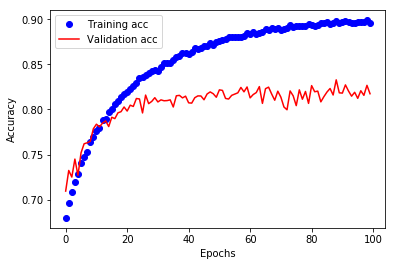

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

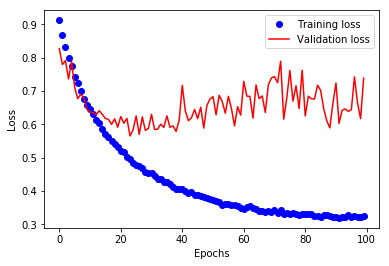

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [19]:
learning_rate = 1E-4 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate, decay=1e-6),
              metrics=['acc'])

In [20]:
history = model.fit(x_train, y_train_vec, batch_size=64, epochs=24)

Epoch 1/24
50000/50000 [==============================] - 22s 442us/step - loss: 0.4456 - acc: 0.8639
Epoch 2/24
50000/50000 [==============================] - 21s 422us/step - loss: 0.4383 - acc: 0.8644
Epoch 3/24
50000/50000 [==============================] - 21s 420us/step - loss: 0.4336 - acc: 0.8643
Epoch 4/24
50000/50000 [==============================] - 21s 421us/step - loss: 0.4278 - acc: 0.8661
Epoch 5/24
50000/50000 [==============================] - 21s 420us/step - loss: 0.4282 - acc: 0.8644
Epoch 6/24
50000/50000 [==============================] - 22s 431us/step - loss: 0.4239 - acc: 0.8680
Epoch 7/24
50000/50000 [==============================] - 22s 430us/step - loss: 0.4252 - acc: 0.8648
Epoch 8/24
50000/50000 [==============================] - 22s 433us/step - loss: 0.4309 - acc: 0.8646
Epoch 9/24
50000/50000 [==============================] - 21s 430us/step - loss: 0.4191 - acc: 0.8668
Epoch 10/24
50000/50000 [==============================] - 21s 429us/step - loss: 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [21]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 2s 216us/step
loss = 0.5820594079494477
accuracy = 0.8233
